<h1>Momentum with Different Polynomials</h1>


<h2>Table of Contents</h2>
<p>In this lab, you will deal with several problems associated with optimization and see how momentum can improve your results.</p>
<ul>
    <li><a href="#Saddle">Saddle Points</a></li>
    <li><a href="#Minima">Local Minima</a></li>
    <li><a href="#Noise"> Noise </a></li>
</ul>

<h2>Preparation</h2>


Import the following libraries that you'll use for this lab:


In [1]:
import torch 
import torch.nn as nn
import matplotlib.pylab as plt
import numpy as np

torch.manual_seed(0)

This function will plot a cubic function and the parameter values obtained via Gradient Descent.


In [2]:
def plot_cubic(w, optimizer):
    LOSS = []
    W = torch.arange(-4, 4, 0.1)

    for w.state_dict()['linear.weight'][0] in W:
        LOSS.append(cubic(w(torch.tensor([[1.0]]))).item())
    
    w.state_dict()['linear.weight'][0] = 4.0
    n_epochs = 10
    parameter = []
    loss_list = []

    for n in range(n_epochs):
        optimizer.zero_grad() 
        loss = cubic(w(torch.tensor([[1.0]])))
        loss_list.append(loss)
        parameter.append(w.state_dict()['linear.weight'][0].detach().data.item())
        loss.backward()
        optimizer.step()

    plt.plot(parameter, [loss.detach().numpy().flatten()  for loss in loss_list], 'ro', label='parameter values')
    plt.plot(W.numpy(), LOSS, label='objective function')
    plt.xlabel('w')
    plt.ylabel('l(w)')
    plt.legend()

This function will plot a 4th order function and the parameter values obtained via Gradient Descent. You can also add Gaussian noise with a standard deviation determined by the parameter <code>std</code>.


In [3]:
def plot_fourth_order(w, optimizer, std=0, color='r', paramlabel='parameter values', objfun=True):
    W = torch.arange(-4, 6, 0.1)
    LOSS = []

    for w.state_dict()['linear.weight'][0] in W:
        LOSS.append(fourth_order(w(torch.tensor([[1.0]]))).item())
    
    w.state_dict()['linear.weight'][0] = 6
    n_epochs = 100
    parameter = []
    loss_list = []

    for n in range(n_epochs):
        optimizer.zero_grad()
        loss = fourth_order(w(torch.tensor([[1.0]]))) + std * torch.randn(1, 1)
        loss_list.append(loss)
        parameter.append(w.state_dict()['linear.weight'][0].detach().data.item())
        loss.backward()
        optimizer.step()
    
    if objfun:
        plt.plot(W.numpy(), LOSS, label='objective function')
    
    plt.plot(parameter, [loss.detach().numpy().flatten()  for loss in loss_list], 'ro', label='paramlabel', color=color)
    plt.xlabel('w')
    plt.ylabel('l(w)')
    plt.legend()

This is a custom module. It will behave like a single parameter value. We do it this way so we can use PyTorch's build-in optimizers .


In [5]:
class one_param(nn.Module):
    def __init__(self, input_size, output_size):
        super(one_param, self).__init__()
        self.linear = nn.Linear(input_size, output_size, bias=False)
        
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

We create an object <code>w</code>, when we call the object with an input of one, it will behave like an individual parameter value. i.e <code>w(1)</code> is analogous to $w$ 


In [6]:
w = one_param(1, 1)

<a name="Saddle"><h2 id="Saddle">Saddle Points</h2></a>


Let's create a cubic function with Saddle points 


In [7]:
def cubic(yhat):
    out = yhat ** 3
    return out

We create an optimizer with no momentum term 


In [8]:
optimizer = torch.optim.SGD(w.parameters(), lr=0.01, momentum=0)

We run several iterations of stochastic gradient descent and plot the results. We see the parameter values get stuck in the saddle point.


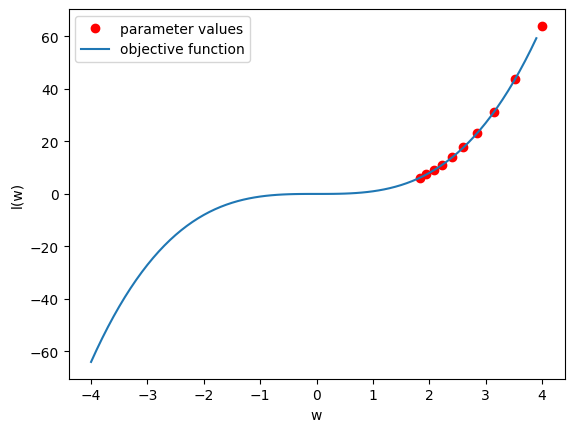

In [9]:
plot_cubic(w, optimizer)

we create an optimizer with momentum term of 0.9


In [10]:
optimizer = torch.optim.SGD(w.parameters(), lr=0.01, momentum=0.9)

We run several iterations of stochastic gradient descent with momentum and plot the results. We see the parameter values do not get stuck in the saddle point.


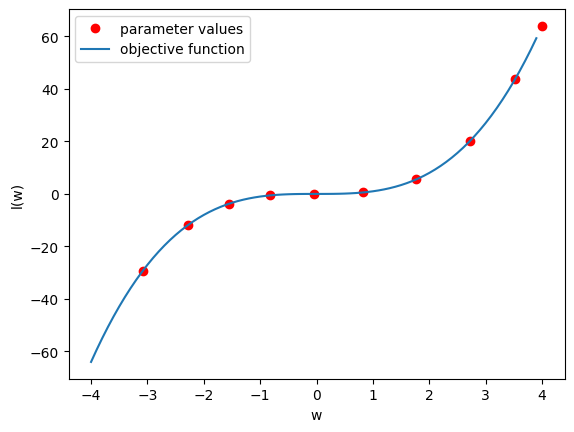

In [11]:
plot_cubic(w, optimizer)

<a name="Minima"><h2 id="Minima">Local Minima</h2></a>


In this section, we will create a fourth order polynomial with a local minimum at <i>4</i> and a global minimum a <i>-2</i>. We will then see how the momentum parameter affects convergence to a global minimum. The fourth order polynomial is given by:


In [12]:
def fourth_order(yhat): 
    out = torch.mean(2 * (yhat ** 4) - 9 * (yhat ** 3) - 21 * (yhat ** 2) + 88 * yhat + 48)
    return out

We create an optimizer with no momentum term. We run several iterations of stochastic gradient descent and plot the results. We see the parameter values get stuck in the local minimum.


/tmp/ipykernel_35/2527711891.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(parameter, [loss.detach().numpy().flatten()  for loss in loss_list], 'ro', label='paramlabel', color=color)


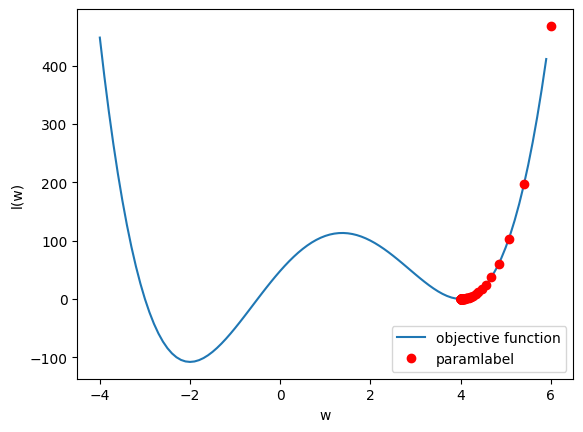

In [13]:
optimizer = torch.optim.SGD(w.parameters(), lr=0.001)
plot_fourth_order(w, optimizer)

We create an optimizer with a  momentum term of 0.9. We run several iterations of stochastic gradient descent and plot the results. We see the parameter values reach a global minimum.


/tmp/ipykernel_35/2527711891.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(parameter, [loss.detach().numpy().flatten()  for loss in loss_list], 'ro', label='paramlabel', color=color)


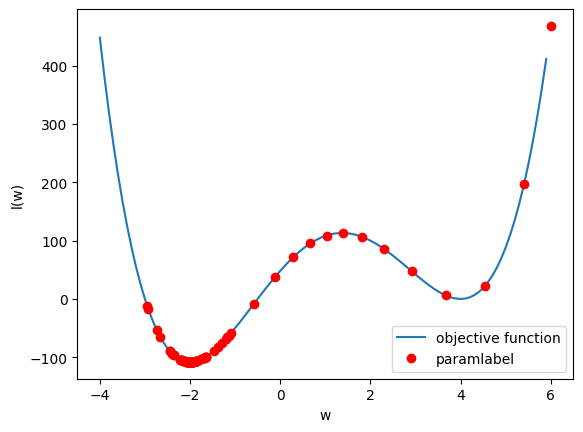

In [14]:
optimizer = torch.optim.SGD(w.parameters(), lr=0.001, momentum=0.9)
plot_fourth_order(w, optimizer)

<a name="Noise"><h2 id="Noise">Noise</h2></a>


In this section, we will create a fourth order polynomial with a local minimum at 4 and a global minimum a -2, but we will add noise to the function when the Gradient is calculated. We will then see how the momentum parameter affects convergence to a global minimum. 


with no momentum, we get stuck in a local minimum 


/tmp/ipykernel_35/2527711891.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(parameter, [loss.detach().numpy().flatten()  for loss in loss_list], 'ro', label='paramlabel', color=color)


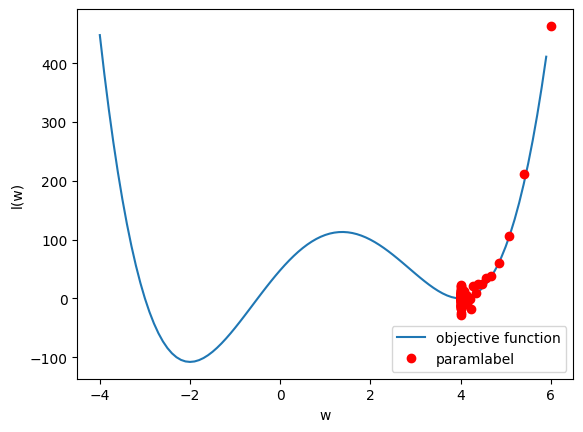

In [15]:
optimizer = torch.optim.SGD(w.parameters(), lr=0.001)
plot_fourth_order(w, optimizer, std=10)

with  momentum, we get to the global  minimum 


/tmp/ipykernel_35/2527711891.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(parameter, [loss.detach().numpy().flatten()  for loss in loss_list], 'ro', label='paramlabel', color=color)


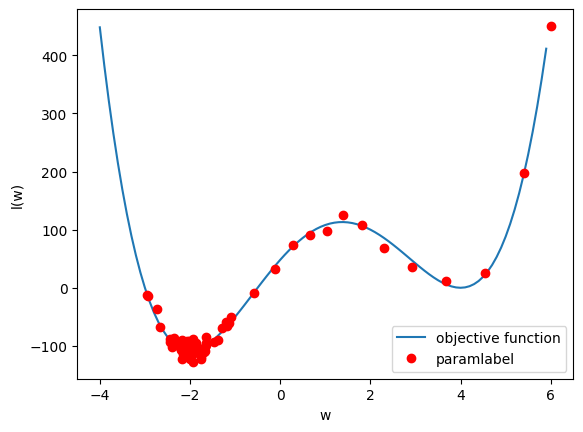

In [16]:
optimizer = torch.optim.SGD(w.parameters(), lr=0.001,momentum=0.9)
plot_fourth_order(w, optimizer, std=10)

<h3>Practice</h3>


Create two <code>SGD</code>  objects with a learning rate of <code>0.001</code>. Use the default momentum parameter value  for one and a value of <code>0.9</code> for the second. Use the function <code>plot_fourth_order</code> with an <code>std=100</code>, to plot the different steps of each. Make sure you run the function on two independent cells.


/tmp/ipykernel_35/2527711891.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(parameter, [loss.detach().numpy().flatten()  for loss in loss_list], 'ro', label='paramlabel', color=color)


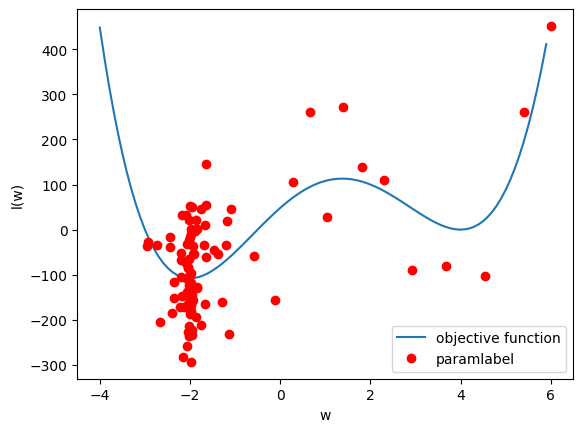

In [17]:
# Practice: Create two SGD optimizer with lr = 0.001, and one without momentum and the other with momentum = 0.9. Plot the result out.
lr = 0.001
momentum = 0.9
optimizer = torch.optim.SGD(w.parameters(), lr=lr, momentum=momentum)
plot_fourth_order(w, optimizer, std=100)